In [1]:
# Import packages
from keras.datasets import mnist
from matplotlib import pyplot
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

/home/mrmad/anaconda3/envs/dl/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load MNIST Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# check dataset shape
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
#function for plotting the image
def display_digit(num, x_train, y_train):
    #label = y_train[num]
    image = x_train[num].reshape([28,28])
    #pyplot.title('Example: %d  Label: %d' % (num, label))
    pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')
    pyplot.show()

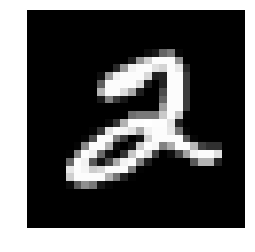

In [4]:
## plot sample image no.5 from original dataset
display_digit(5, X_train, y_train)

In [5]:
# prepare images for permutations

# ZCA whitening
K.set_image_dim_ordering('th')

# reshape to be [samples][pixels][width][height]
X_train_modified = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test_modified = X_test.reshape(X_test.shape[0], 1, 28, 28)

# convert from int to float
X_train_final = X_train_modified.astype('float32')
X_test_final = X_train_modified.astype('float32')

In [6]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)

# fit parameters from data
datagen.fit(X_train_final)

# configure batch size and retrieve one batch of images
# save images into file

os.makedirs('mnist_images_zca')
i=1

for X_batch, y_batch in datagen.flow(X_train_final, y_train,batch_size =1,save_to_dir='mnist_images_zca', save_prefix='zca', save_format='png'):
    #display_digit(5, X_batch, y_batch)
    i += 1
    if i >60000:
        break  # otherwise the generator would loop indefinitely

/home/mrmad/anaconda3/envs/dl/lib/python3.5/site-packages/keras/preprocessing/image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [7]:
# Random Rotations
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen.fit(X_train_final)

os.makedirs('mnist_images_rotation')
i=1

for X_batch, y_batch in datagen.flow(X_train_final, y_train,batch_size =1,save_to_dir='mnist_images_rotation', save_prefix='rot', save_format='png'):
    i += 1
    if i >60000:
        break  # otherwise the generator would loop indefinitely

In [8]:
# Random Flips

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(X_train_final)

os.makedirs('mnist_images_flips')
i=1

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_final, y_train,batch_size =1,save_to_dir='mnist_images_flips', save_prefix='flips', save_format='png'):
    i += 1
    if i >60000:
        break  # otherwise the generator would loop indefinitely